# Assignment 2: Plottings

Create data visualizations comparing different groups of Copenhagen citizens. For example:
1. Create a bar plot that shows distribution of german and british citizens in terms of age.
2. How many French are there compared to Germans and how are they distributed over various neighbourhoods?
3. Create a pie chart showing the 5 major citizen groups of age between 20-65
4. (red assignment) Try to add the markers that you get from the GeoJson response exercise 2 to the map.
  
**Hint**: Make use of https://www.dst.dk/da/Statistik/dokumentation/Times/forebyggelsesregistret/statkode.aspx to find the citizenship category numbers.

For exercise 4 make use of:
``` python
folium.Marker([12.578995447902946, 55.713167699503515], popup='some text here').add_to(map_osm)
```
and follow the documentation at http://folium.readthedocs.io/en/latest/quickstart.html


In [17]:
# imports

import kkdata
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
france = 5130
great_britain = 5170
germany = 5180

# url with data
url = 'http://data.kk.dk/dataset/76ecf368-bf2d-46a2-bcf8-adaf37662528/resource/9286af17-f74e-46c9-a428-9fb707542189/download/befkbhalderstatkode.csv'

# getting the data as a dictionary
data = kkdata.get_dict_from_url_csv(url)

french_data = {}
british_data = {}
german_data = {}

# extracting data about french, british, and german citizens
for year in data.keys():
    for area in data[year]:
            for age in data[year][area]:
                for citizen_code in data[year][area][age]:
                    if citizen_code == france:
                        french_data.setdefault(year,{}).setdefault(area,{}).setdefault(age,0)
                        french_data[year][area][age] += data[year][area][age][citizen_code]
                    elif citizen_code == great_britain:
                        british_data.setdefault(year,{}).setdefault(area,{}).setdefault(age,0)
                        british_data[year][area][age] += data[year][area][age][citizen_code]
                    elif citizen_code == germany:
                        german_data.setdefault(year,{}).setdefault(area,{}).setdefault(age,0)
                        german_data[year][area][age] += data[year][area][age][citizen_code]

### Create a bar plot that shows distribution of german and british citizens in terms of age.

In [3]:
german_by_age = {}
british_by_age = {}

# grouping the data by ages
for year in german_data.keys():
    for area in german_data[year].keys():
        for age in german_data[year][area].keys():
            german_by_age.setdefault(year,{}).setdefault(age,0)
            german_by_age[year][age] += german_data[year][area][age]
for year in british_data.keys():
    for area in british_data[year].keys():
        for age in british_data[year][area].keys():
            british_by_age.setdefault(year,{}).setdefault(age,0)
            british_by_age[year][age] += british_data[year][area][age]

<IPython.core.display.Javascript object>


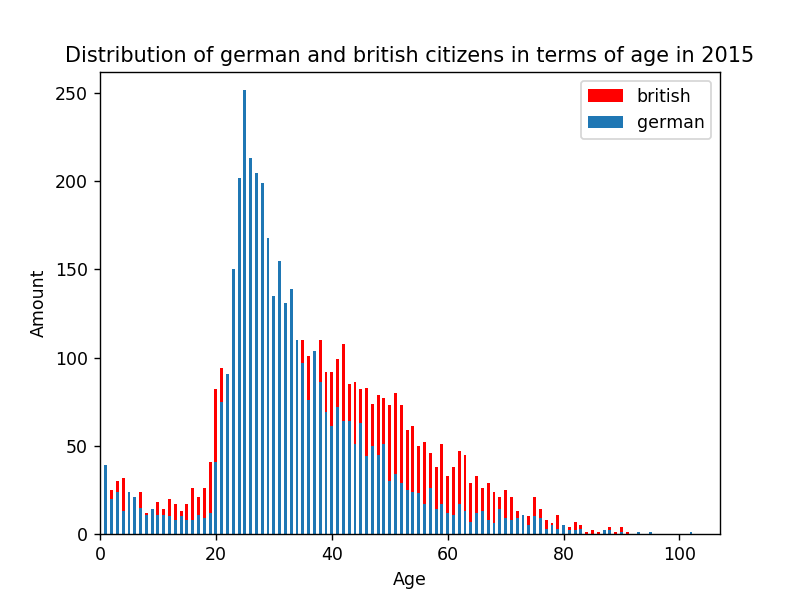

In [18]:
g_ages = german_by_age[2015].keys()
germans = german_by_age[2015].values()
b_ages = british_by_age[2015].keys()
brits = british_by_age[2015].values()

plt.figure()

plt.axis([0, max(max(g_ages), max(b_ages)) + 5, 0, max(max(germans), max(brits)) + 10])
plt.title('Distribution of german and british citizens in terms of age in 2015', fontsize=12)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Amount", fontsize=10)

b_plot = plt.bar(b_ages, brits, width=0.5, align='center', color='red')
g_plot = plt.bar(g_ages, germans, width=0.5, align='center')

plt.legend((b_plot, g_plot), ('british', 'german'))

In [5]:
french_by_area = {}
german_by_area = {}

# grouping the data by area
for year in german_data.keys():
    for area in german_data[year].keys():
        for age in german_data[year][area].keys():
            german_by_area.setdefault(year,{}).setdefault(area,0)
            german_by_area[year][area] += german_data[year][area][age]
for year in french_data.keys():
    for area in french_data[year].keys():
        for age in french_data[year][area].keys():
            french_by_area.setdefault(year,{}).setdefault(area,0)
            french_by_area[year][area] += french_data[year][area][age]

<IPython.core.display.Javascript object>


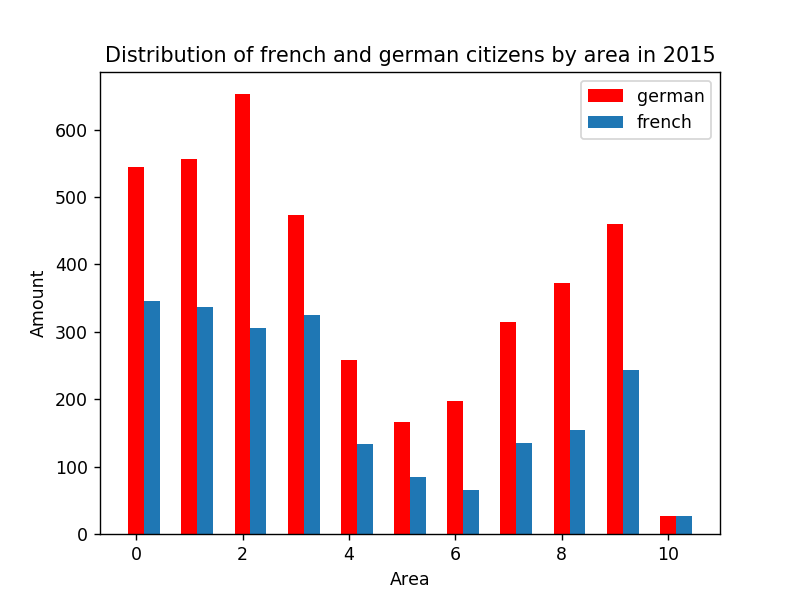

In [19]:
import numpy as np

germans = german_by_area[2015].values()
french = french_by_area[2015].values()

plt.figure()

# Set position of bar on X axis
r1 = np.arange(len(germans))
r2 = [x + 0.3 for x in r1]

plt.title('Distribution of french and german citizens by area in 2015', fontsize=12)
plt.xlabel("Area", fontsize=10)
plt.ylabel("Amount", fontsize=10)

g_plot = plt.bar(r1, germans, width=0.3, align='center', color='red')
f_plot = plt.bar(r2, french, width=0.3, align='center')

plt.legend((g_plot, f_plot), ('german', 'french'))

In [7]:
data_by_citizen_code = {}

for year in data.keys():
    for area in data[year]:
            for age in data[year][area]:
                for citizen_code in data[year][area][age]:
                    # ignore danish citizens
                    if citizen_code != 5100:
                        data_by_citizen_code.setdefault(year,{}).setdefault(citizen_code,0)
                        # count people in ages 20-65 inclusive
                        if 20 <= age <= 65:
                            data_by_citizen_code[year][citizen_code] += data[year][area][age][citizen_code]

<IPython.core.display.Javascript object>


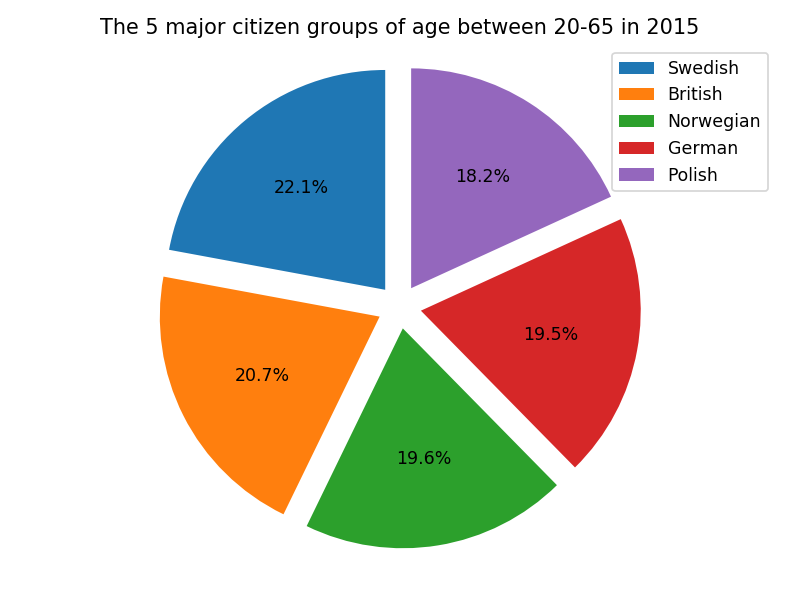

In [20]:
plt.figure()

data_by_citizen_code_2015_sorted = sorted(data_by_citizen_code[2015].items(), key=lambda x:x[1], reverse=True)

data_keys = [x[0] for x in data_by_citizen_code_2015_sorted]
data_values = [x[1] for x in data_by_citizen_code_2015_sorted]

# 5 major citizen groups of age between 20-65
labels = ('Swedish', 'British', 'Norwegian', 'German', 'Polish')

plt.pie(data_values[:5], autopct='%1.1f%%', startangle=90, explode=(0.1, 0.1, 0.1, 0.1, 0.1))
plt.title('The 5 major citizen groups of age between 20-65 in 2015')
plt.legend(labels)
plt.axis('equal')
plt.tight_layout()

### 4 (red assignment) Try to add the markers that you get from the GeoJson response exercise 2 to the map.

In [21]:
# install folium with ( $ pip install folium )

import json
import requests
import folium

url = 'http://wfs-kbhkort.kk.dk/k101/ows?service=WFS&version=1.0.0&' \
      'request=GetFeature&typeName=k101:storbyhaver&outputFormat=json&SRSNAME=EPSG:4326'

# requests json data from ( wfs-kbhkort api )
def get_geojson(url):
    response = requests.get(url)
    geo_json = response.json()
    return geo_json

# calls gets json data
locations = get_geojson(url)

# creates a folium map ( default target set to copenhagen and zoom to fit the area )
folium_map = folium.Map(location = [55.6713442, 12.5237849], zoom_start = 12)

# adds markers at locations to the folium map
for location in locations['features']:

    # converts null values to generic message ( kommer snart... )
    info = location['properties']['beskrivelse'] if location['properties']['beskrivelse'] else 'kommer snart...'
    
    # creates marker
    folium.Marker(
        
        # location longitude and latitude ( reversed due to the coordinates comes in the wrong order )
        location['geometry']['coordinates'][0][::-1],
        
        # info in popup box (html)
        popup = (
            '<b>{}</b>'.format(location['properties']['navn']) +
            '<br><br>' +
            '<b>beskrivelse:</b> {}'.format(info)
        )
    
    # adds marker to the folium map
    ).add_to(folium_map)

# saves folium map as html in current directory
folium_map.save('./folium_map.html')

# diplays folium map
folium_map